# Task1

Importing 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [16]:
# Load the dataset
iris = datasets.load_iris()
a = iris.data  # Features (sepal & petal length & width)
b = iris.target  # Labels (Setosa, Versicolor, Virginica)

# Convert to DataFrame for better visualization
df = pd.DataFrame(data=a, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Display first few rows
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [17]:
# Split the dataset into training and testing sets (80% training, 20% testing)
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)


In [18]:
scaler = StandardScaler()
a_train = scaler.fit_transform(a_train)
a_test = scaler.transform(a_test)


In [19]:
# Choose K value (default is 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(a_train, b_train)


KNeighborsClassifier(n_neighbors=3)

In [20]:
b_pred = knn.predict(a_test)


In [21]:
# Print Accuracy
accuracy = accuracy_score(b_test, b_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print Classification Report
print("Classification Report:")
print(classification_report(b_test, b_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(b_test, b_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


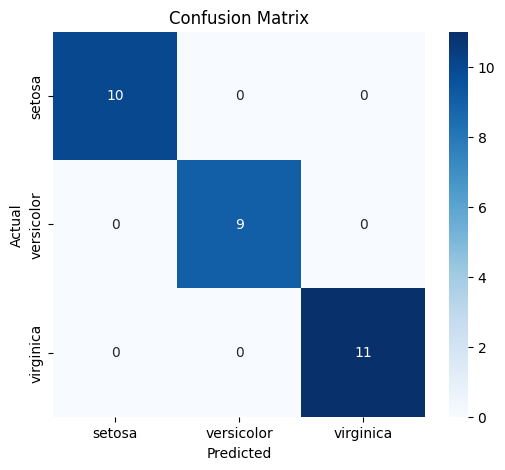

In [22]:
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
